In [17]:
import numpy as np
import librosa
import IPython.display as ipd 
import soundfile as sf

In [26]:
import librosa.display
import matplotlib.pyplot as plt

def plot_signals(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows= 2)
    librosa.display.waveshow(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveshow(augmented_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Augmented signal")
    plt.show()


## ADDING WHITE NOISE

In [19]:
# adding white noise
def add_white_noise(signal, noise_factor):
    # signal is a numpy array (waveform)
    # noise is drawn randomly from a gaussian with 0 mean, std of the signal and has the same size of the signal
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise*noise_factor
    return augmented_signal


In [20]:
signal, sr = librosa.load("3_scale.wav")
augmented_signal = add_white_noise(signal, 0.1)
sf.write("augmented.wav", augmented_signal, sr)

In [21]:
ipd.Audio(signal, rate = sr)

In [22]:
ipd.Audio(augmented_signal, rate = sr)

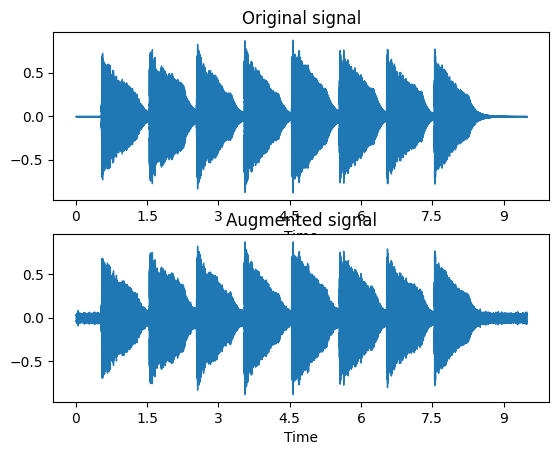

In [27]:
plot_signals(signal, augmented_signal, sr)

## time stretch


In [29]:
# time streching
def time_stretch(signal, stretch_rate):
    return librosa.effects.time_stretch(signal, stretch_rate)


In [31]:
stretch_rate = 0.5
stretched_signal = time_stretch(signal, stretch_rate)
ipd.Audio(stretched_signal, rate = sr)

C:\Users\rikyd\AppData\Local\Temp\ipykernel_12896\3747788510.py:3: FutureWarning: Pass rate=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(signal, stretch_rate)


## pitch scaling


In [32]:
def pitch_scale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

In [33]:
pitched_signal = pitch_scale(signal, sr, 2)
ipd.Audio(pitched_signal, rate = sr)

C:\Users\rikyd\AppData\Local\Temp\ipykernel_12896\758794124.py:2: FutureWarning: Pass sr=22050, n_steps=2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(signal, sr, num_semitones)


## polarity inversion


In [34]:
def invert_polirity(signal):
    return signal * -1

## random gain


In [35]:
def ranfom_gain(signal, min_gain, max_gain):
    gain = np.random.uniform(min_gain, max_gain)
    return signal * gain